In [75]:
import pandas as pd
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime as dt
from datetime import datetime
%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [79]:
df = pd.read_csv('london_merged_v4.csv')


In [80]:
df.head()

,index,timestamp,date,year,month,day,day_name,week_number,time,bike_number,temperature,temperature_feels,hum,wind_speed,weather_code,weather_code_n,is_holiday,is_weekend,season
0,0,2015-01-04 00:00:00,04-01-2015,2015,Jan,4,Sunday,1,00:00,182,3.0,2.0,93.0,6.0,Broken clouds,3,0.0,1.0,3.0
1,1,2015-01-04 01:00:00,04-01-2015,2015,Jan,4,Sunday,1,01:00,138,3.0,2.5,93.0,5.0,Clear,1,0.0,1.0,3.0
2,2,2015-01-04 02:00:00,04-01-2015,2015,Jan,4,Sunday,1,02:00,134,2.5,2.5,96.5,0.0,Clear,1,0.0,1.0,3.0
3,3,2015-01-04 03:00:00,04-01-2015,2015,Jan,4,Sunday,1,03:00,72,2.0,2.0,100.0,0.0,Clear,1,0.0,1.0,3.0
4,4,2015-01-04 04:00:00,04-01-2015,2015,Jan,4,Sunday,1,04:00,47,2.0,0.0,93.0,6.5,Clear,1,0.0,1.0,3.0


Adding hours in number

In [82]:
df['time_hour_n'] = pd.to_datetime(df['time'])
df['time_hour_n'] = pd.to_datetime(df['time_hour_n'])
df['time_hour_n'] = df.time_hour_n.apply(lambda x : x.strftime('%H'))
df['time_hour_n']= df['time_hour_n'].astype('int64')
df['month_n'] = pd.to_datetime(df['timestamp']).dt.month


In [169]:
df

,index,timestamp,date,year,month,day,day_name,week_number,time,bike_number,...,wind_speed,weather_code,weather_code_n,is_holiday,is_weekend,season,time_hour_n,month_n,hours_split,season_name
0,0,2015-01-04 00:00:00,04-01-2015,2015,Jan,4,Sunday,1,00:00,182,...,6.0,Broken clouds,3,0.0,1.0,3.0,0,1,night_00_06,winter
1,1,2015-01-04 01:00:00,04-01-2015,2015,Jan,4,Sunday,1,01:00,138,...,5.0,Clear,1,0.0,1.0,3.0,1,1,night_00_06,winter
2,2,2015-01-04 02:00:00,04-01-2015,2015,Jan,4,Sunday,1,02:00,134,...,0.0,Clear,1,0.0,1.0,3.0,2,1,night_00_06,winter
3,3,2015-01-04 03:00:00,04-01-2015,2015,Jan,4,Sunday,1,03:00,72,...,0.0,Clear,1,0.0,1.0,3.0,3,1,night_00_06,winter
4,4,2015-01-04 04:00:00,04-01-2015,2015,Jan,4,Sunday,1,04:00,47,...,6.5,Clear,1,0.0,1.0,3.0,4,1,night_00_06,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17337,17337,2016-12-31 19:00:00,31-12-2016,2016,Dec,31,Saturday,52,19:00,493,...,17.0,Cloudy,4,0.0,1.0,3.0,19,12,evening_18_23,winter
17338,17338,2016-12-31 20:00:00,31-12-2016,2016,Dec,31,Saturday,52,20:00,465,...,13.0,Cloudy,4,0.0,1.0,3.0,20,12,evening_18_23,winter
17339,17339,2016-12-31 21:00:00,31-12-2016,2016,Dec,31,Saturday,52,21:00,474,...,12.0,Cloudy,4,0.0,1.0,3.0,21,12,evening_18_23,winter
17340,17340,2016-12-31 22:00:00,31-12-2016,2016,Dec,31,Saturday,52,22:00,587,...,12.0,Cloudy,4,0.0,1.0,3.0,22,12,evening_18_23,winter


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17342 entries, 0 to 17341
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              17342 non-null  int64  
 1   timestamp          17342 non-null  object 
 2   date               17342 non-null  object 
 3   year               17342 non-null  int64  
 4   month              17342 non-null  object 
 5   day                17342 non-null  int64  
 6   day_name           17342 non-null  object 
 7   week_number        17342 non-null  int64  
 8   time               17342 non-null  object 
 9   bike_number        17342 non-null  int64  
 10  temperature        17342 non-null  float64
 11  temperature_feels  17342 non-null  float64
 12  hum                17342 non-null  float64
 13  wind_speed         17342 non-null  float64
 14  weather_code       17342 non-null  object 
 15  weather_code_n     17342 non-null  int64  
 16  is_holiday         173

# Correlation

<Figure size 432x288 with 0 Axes>

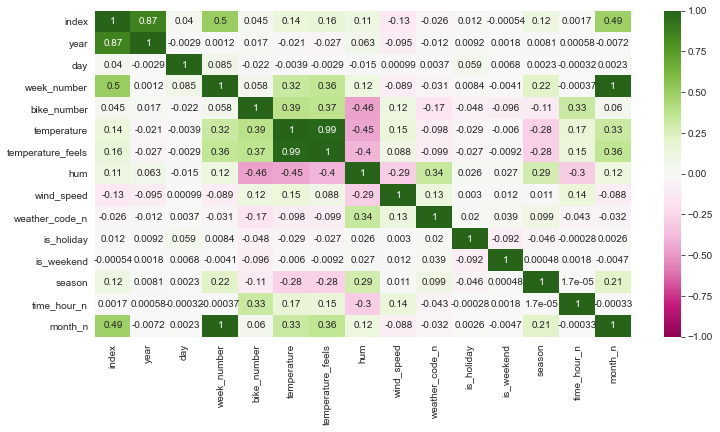

In [86]:
plt.clf()
fig = plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap='PiYG', vmin=-1, annot=True)
plt.show()

In [5]:
df.columns

Index(['index', 'timestamp', 'date', 'year', 'month', 'day', 'day_name',
       'week_number', 'time', 'bike_number', 'temperature',
       'temperature_feels', 'hum', 'wind_speed', 'weather_code',
       'weather_code_n', 'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [88]:
df.corr().bike_number.abs().sort_values(ascending=False)

bike_number          1.000000
hum                  0.461812
temperature          0.387686
temperature_feels    0.367890
time_hour_n          0.325192
weather_code_n       0.166491
wind_speed           0.115708
season               0.113563
is_weekend           0.095873
month_n              0.060369
week_number          0.057645
is_holiday           0.047960
index                0.044507
day                  0.021814
year                 0.017346
Name: bike_number, dtype: float64

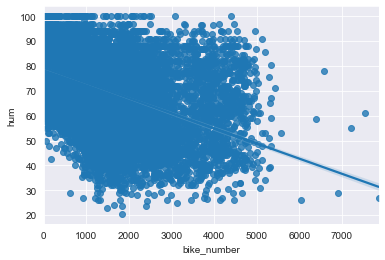

In [89]:
sns.regplot(data=df, x='bike_number' , y='hum')
plt.show()

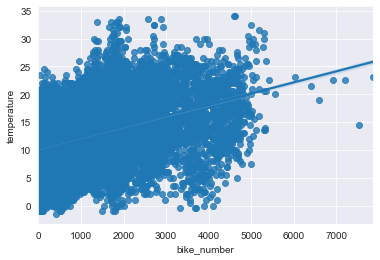

In [90]:
sns.regplot(data=df, x='bike_number' , y='temperature')
plt.show()

<AxesSubplot:xlabel='bike_number', ylabel='temperature_feels'>

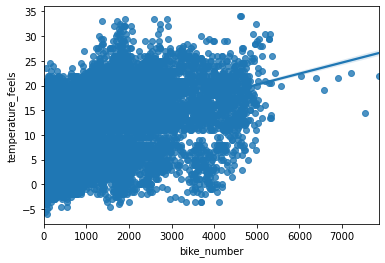

In [24]:
sns.regplot(data=df, x='bike_number' , y=df['temperature_feels'])

In [94]:
correlation = ['hum', 'temperature', 'temperature_feels', 'time_hour_n', 'weather_code_n', 'wind_speed',
               'season', 'is_weekend', 'month_n', 'week_number','is_holiday','day', 'year']

<Figure size 432x288 with 0 Axes>

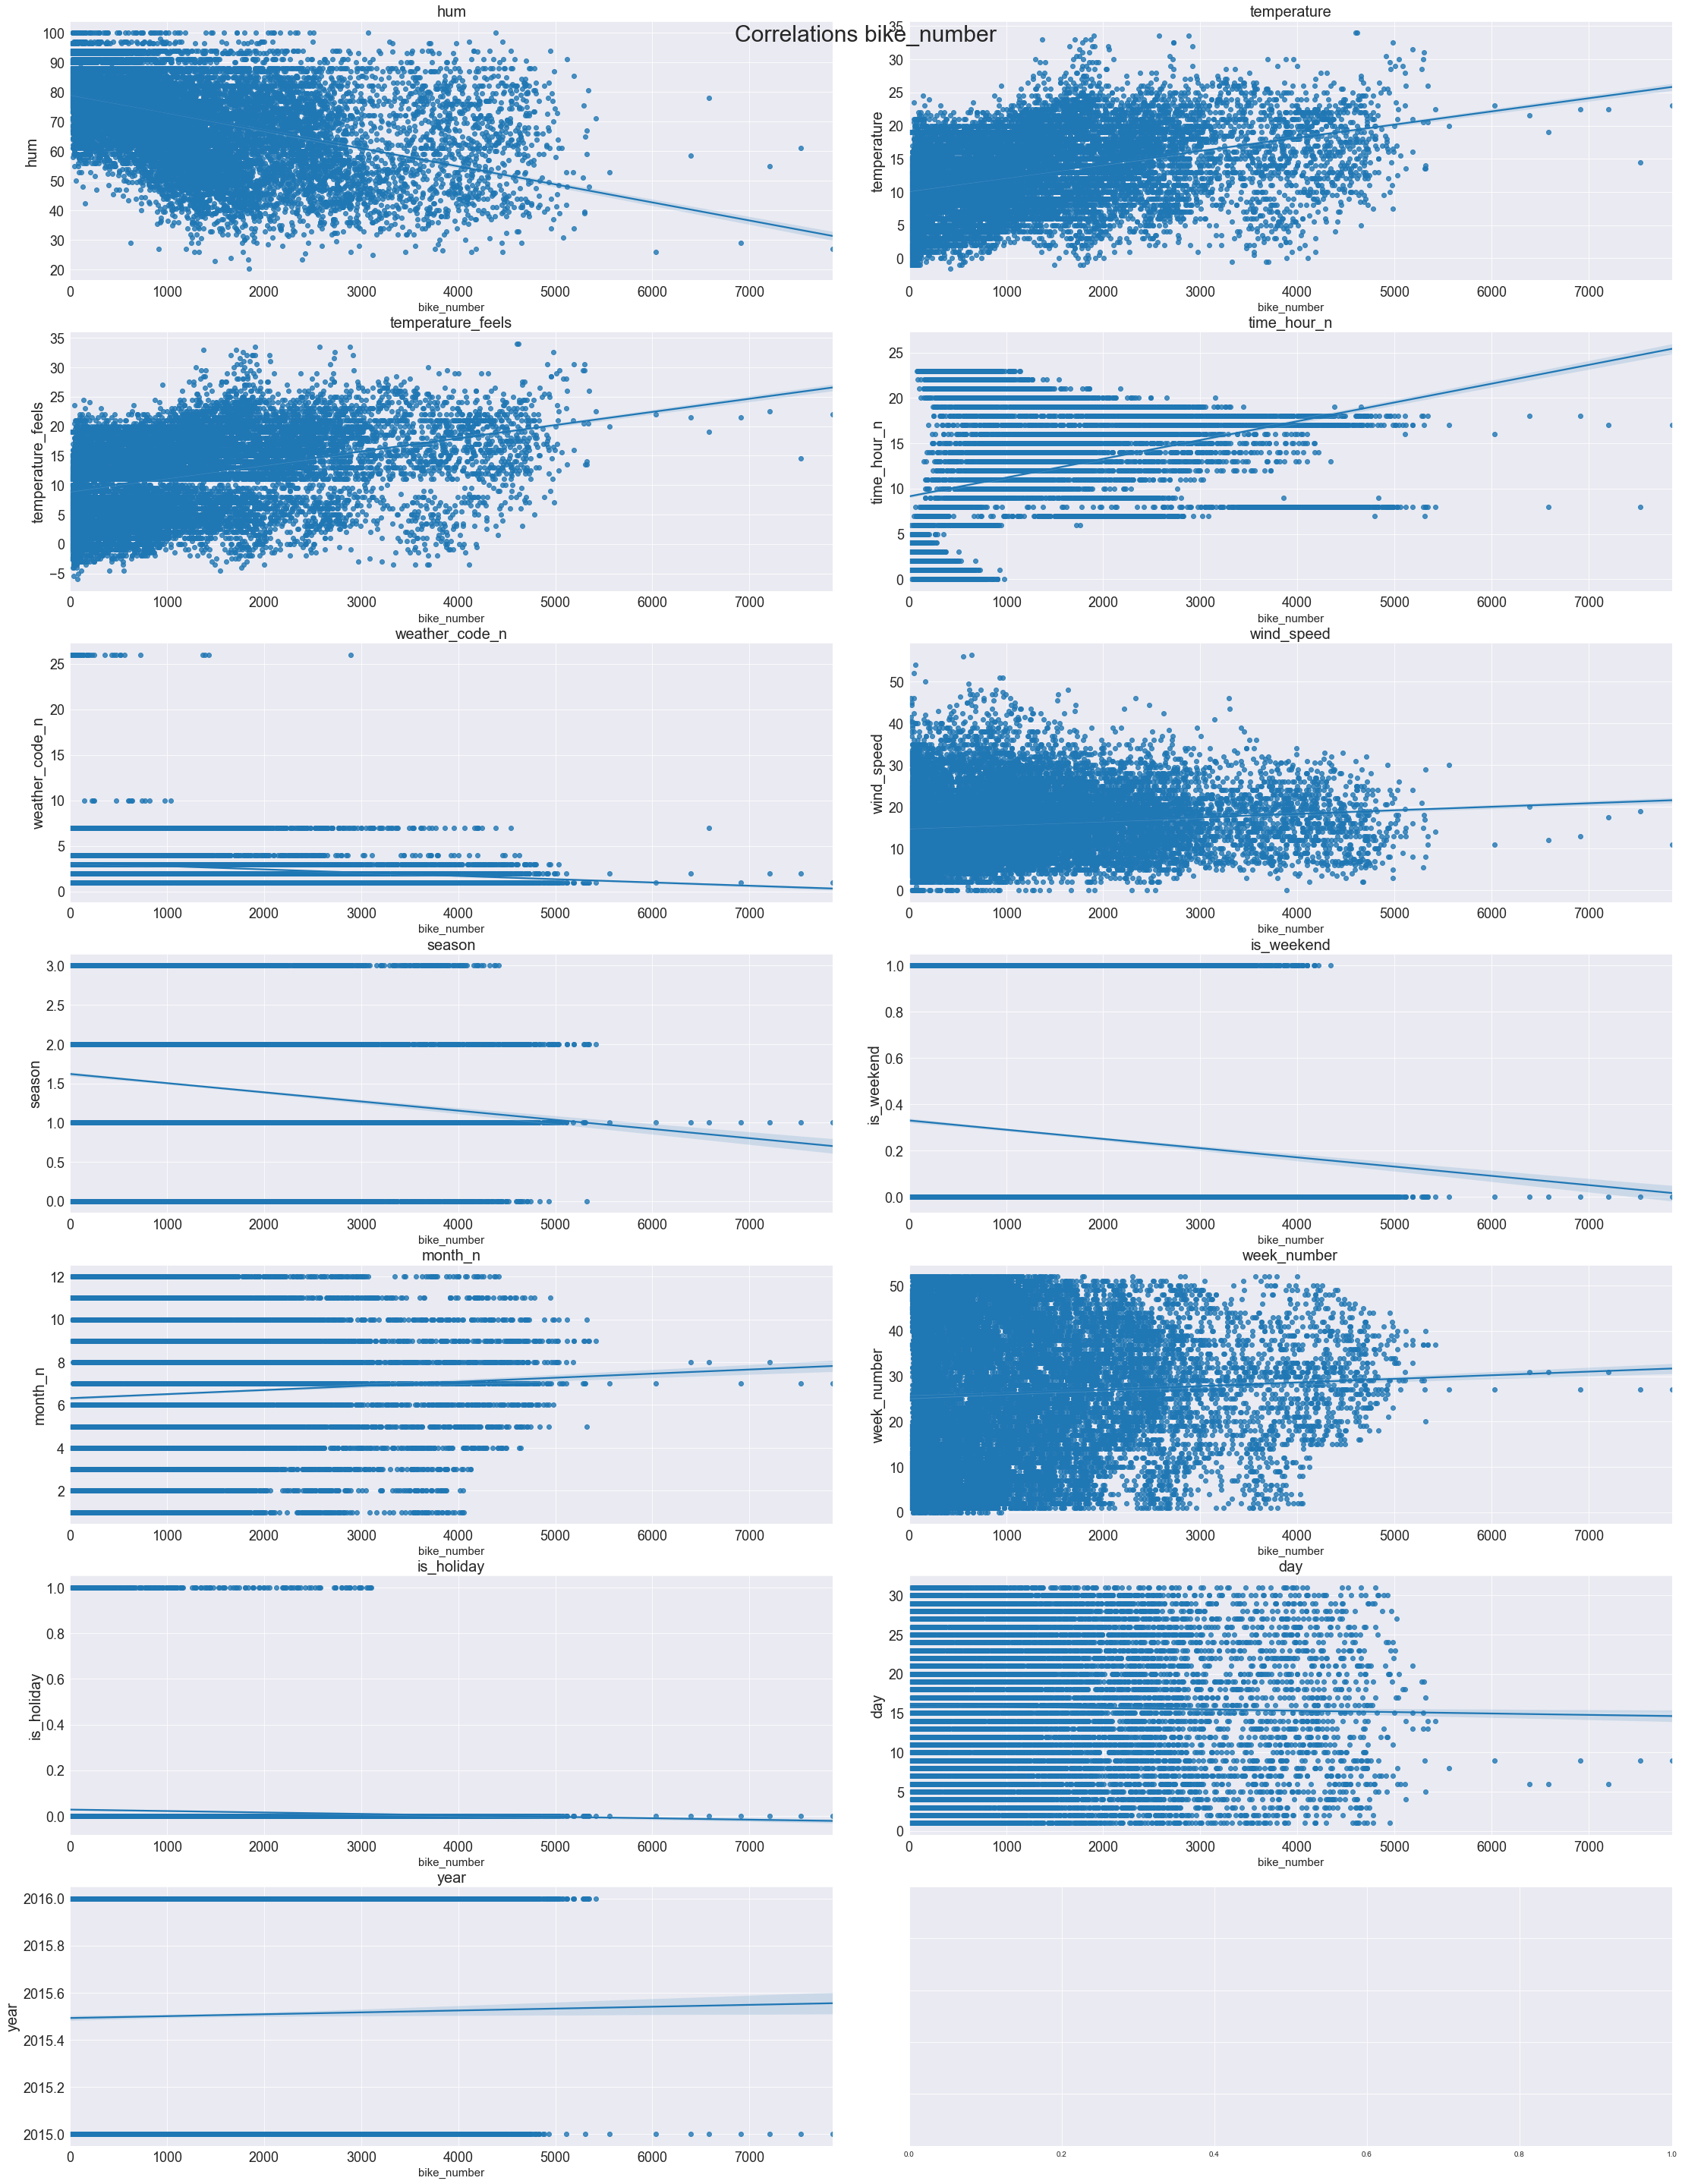

In [109]:
plt.clf();
sns.set_style("darkgrid");


fig, axs = plt.subplots(7,2, figsize=(30, 40), sharex=True, sharey=True);
axs = plt.gca()
fig.suptitle('Correlations bike_number', fontsize=30)
fig.tight_layout() 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.2);

for i, j in enumerate(correlation):
    if j in correlation:
        axs = plt.subplot(7,2, i+1)
        axs = sns.regplot(data=df, x=df['bike_number'] , y=df[j])
        axs.tick_params(axis='both', which='major', labelsize=18)
        axs.set_xlabel('bike_number',fontsize = 15)
        axs.set_ylabel(f'{j}',fontsize = 20)
        axs.set_title(f'{j}',fontsize = 20)
    else:
        plt.tight_layout()
        plt.show()
        pass

plt.savefig('.\Isra_plots/Top_Correlations_Subplots.png', dpi = 500);    

# Distribution

<AxesSubplot:>

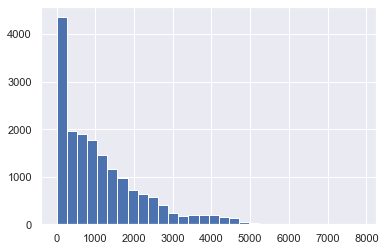

In [271]:
df['bike_number'].hist(bins=30)

<AxesSubplot:>

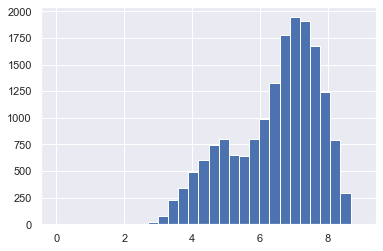

In [270]:
(df['bike_number']+1).map(np.log).hist(bins=30)

In [110]:

import pandas as pd
import numpy as np
import scipy
from scipy import stats

#Please write below the name of the statistical distributions that you would like to check.
#Full list is here: https://docs.scipy.org/doc/scipy/reference/stats.html
dist_names = ['weibull_min','norm','weibull_max','beta',
              'invgauss','uniform','gamma','expon',   
              'lognorm','pearson3','triang']

#Read your data and set y_std to the column that you want to fit.
y_std=df.copy()
y_std=y_std['bike_number']

#-------------------------------------------------
chi_square_statistics = []
size=len(y_std)

# 20 equi-distant bins of observed Data 
percentile_bins = np.linspace(0,100,20)
percentile_cutoffs = np.percentile(y_std, percentile_bins)
observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

# Loop through candidate distributions
for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(y_std)
    print("{}\n{}\n".format(dist, param))

    # Get expected counts in percentile bins
    # cdf of fitted sistrinution across bins
    cdf_fitted = dist.cdf(percentile_cutoffs, *param)
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)

    # Chi-square Statistics
    expected_frequency = np.array(expected_frequency) * size
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
    chi_square_statistics.append(ss)


#Sort by minimum ch-square statistics
results = pd.DataFrame()
results['Distribution'] = dist_names
results['chi_square'] = chi_square_statistics
results.sort_values(['chi_square'], inplace=True)


print ('\nDistributions listed by goodness of fit:')
print ('............................................')
print (results)

(0.13851463729658986, -1.4801507064814763e-24, 2.365885879318644)

(1145.6747779956177, 1085.8920865692035)

(0.09720439086526139, 7860.000000000001, 1.7507836044711285)



C:\Users\israe\miniconda3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


(0.8740032935064301, 6.553801575415109, -9.068646068627245e-28, 9692.844569317655)

(1.555318588863063, -71.61654445672762, 701.4040644950594)

(0.0, 7860.0)

(0.9599161937885371, -1.2212887025846313e-11, 1191.4870133826873)

(0.0, 1145.6747779956177)

(5.272079066503009, -3.3241377350278325e-13, 0.40146601131573834)

(2.042151579527003, 1160.0160100137964, 1184.464263563143)

(0.15549866006904078, -1289.9050764309172, 9150.59391164417)


Distributions listed by goodness of fit:
............................................
   Distribution     chi_square
3          beta     518.616906
9      pearson3     731.083910
6         gamma     736.030745
7         expon     966.050019
4      invgauss    5081.606066
1          norm   28521.610715
10       triang   54851.996299
5       uniform   83313.444065
2   weibull_max  154148.920360
0   weibull_min  427070.335945
8       lognorm  478114.835628


## Dummies ! I will create Dummies by time (Early morning, Morning Afternoon Everning Nigyh,) Day (Monday... Sundayu), Month (Jan...Dec), Season:



Create a columns with different categories splitting the full day hours

In [148]:
conditions= [df.eval('00<=time_hour_n<6'),
            df.eval('6<=time_hour_n<12'),
            df.eval('12<=time_hour_n<18'),
            df.eval('18<=time_hour_n<=23')]

In [150]:
values = ['night_00_06', 'morning_06_12', 'afternoon12_18', 'evening_18_23']


In [151]:
df['hours_split'] = np.select(conditions, values)

In [277]:
pd.qcut(df.time_hour_n, 5)

0        (-0.001, 4.0]
1        (-0.001, 4.0]
2        (-0.001, 4.0]
3        (-0.001, 4.0]
4        (-0.001, 4.0]
             ...      
17337     (14.0, 19.0]
17338     (19.0, 23.0]
17339     (19.0, 23.0]
17340     (19.0, 23.0]
17341     (19.0, 23.0]
Name: time_hour_n, Length: 17342, dtype: category
Categories (5, interval[float64]): [(-0.001, 4.0] < (4.0, 9.0] < (9.0, 14.0] < (14.0, 19.0] < (19.0, 23.0]]

In [280]:
from statsmodels.formula.api import ols

<AxesSubplot:>

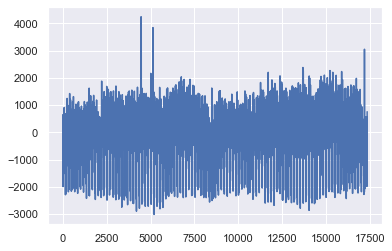

In [300]:
ols('bike_number ~temperature +hum + wind_speed +is_weekend +is_holiday +C(time_hour_n)',data=df).fit().resid.plot()

In [281]:
df.columns

Index(['index', 'timestamp', 'date', 'year', 'month', 'day', 'day_name',
       'week_number', 'time', 'bike_number', 'temperature',
       'temperature_feels', 'hum', 'wind_speed', 'weather_code',
       'weather_code_n', 'is_holiday', 'is_weekend', 'season', 'time_hour_n',
       'month_n', 'hours_split', 'season_name'],
      dtype='object')

Season - It is with numbers, let's change it to categories
* "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

In [158]:
conditions = [df.eval('season == 0'), df.eval('season == 1'), df.eval('season == 2'), df.eval('season == 3')]

In [159]:
values = ['spring', 'summer', 'autumn', 'winter']

In [160]:
df['season_name'] = np.select(conditions, values)

In [163]:
df

,index,timestamp,date,year,month,day,day_name,week_number,time,bike_number,...,wind_speed,weather_code,weather_code_n,is_holiday,is_weekend,season,time_hour_n,month_n,hours_split,season_name
0,0,2015-01-04 00:00:00,04-01-2015,2015,Jan,4,Sunday,1,00:00,182,...,6.0,Broken clouds,3,0.0,1.0,3.0,0,1,night_00_06,winter
1,1,2015-01-04 01:00:00,04-01-2015,2015,Jan,4,Sunday,1,01:00,138,...,5.0,Clear,1,0.0,1.0,3.0,1,1,night_00_06,winter
2,2,2015-01-04 02:00:00,04-01-2015,2015,Jan,4,Sunday,1,02:00,134,...,0.0,Clear,1,0.0,1.0,3.0,2,1,night_00_06,winter
3,3,2015-01-04 03:00:00,04-01-2015,2015,Jan,4,Sunday,1,03:00,72,...,0.0,Clear,1,0.0,1.0,3.0,3,1,night_00_06,winter
4,4,2015-01-04 04:00:00,04-01-2015,2015,Jan,4,Sunday,1,04:00,47,...,6.5,Clear,1,0.0,1.0,3.0,4,1,night_00_06,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17337,17337,2016-12-31 19:00:00,31-12-2016,2016,Dec,31,Saturday,52,19:00,493,...,17.0,Cloudy,4,0.0,1.0,3.0,19,12,evening_18_23,winter
17338,17338,2016-12-31 20:00:00,31-12-2016,2016,Dec,31,Saturday,52,20:00,465,...,13.0,Cloudy,4,0.0,1.0,3.0,20,12,evening_18_23,winter
17339,17339,2016-12-31 21:00:00,31-12-2016,2016,Dec,31,Saturday,52,21:00,474,...,12.0,Cloudy,4,0.0,1.0,3.0,21,12,evening_18_23,winter
17340,17340,2016-12-31 22:00:00,31-12-2016,2016,Dec,31,Saturday,52,22:00,587,...,12.0,Cloudy,4,0.0,1.0,3.0,22,12,evening_18_23,winter


### Creating Dummies

In [165]:
df1 = pd.get_dummies(data=df, columns=['year', 'month', 'day_name', 'weather_code', 'hours_split', 'season_name' ], drop_first=True)

In [166]:
df1

,index,timestamp,date,day,week_number,time,bike_number,temperature,temperature_feels,hum,...,weather_code_Few clouds,weather_code_Light rain,weather_code_Rain & Thunderstorm,weather_code_Snowfall,hours_split_evening_18_23,hours_split_morning_06_12,hours_split_night_00_06,season_name_spring,season_name_summer,season_name_winter
0,0,2015-01-04 00:00:00,04-01-2015,4,1,00:00,182,3.0,2.0,93.0,...,0,0,0,0,0,0,1,0,0,1
1,1,2015-01-04 01:00:00,04-01-2015,4,1,01:00,138,3.0,2.5,93.0,...,0,0,0,0,0,0,1,0,0,1
2,2,2015-01-04 02:00:00,04-01-2015,4,1,02:00,134,2.5,2.5,96.5,...,0,0,0,0,0,0,1,0,0,1
3,3,2015-01-04 03:00:00,04-01-2015,4,1,03:00,72,2.0,2.0,100.0,...,0,0,0,0,0,0,1,0,0,1
4,4,2015-01-04 04:00:00,04-01-2015,4,1,04:00,47,2.0,0.0,93.0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17337,17337,2016-12-31 19:00:00,31-12-2016,31,52,19:00,493,9.0,6.0,82.0,...,0,0,0,0,1,0,0,0,0,1
17338,17338,2016-12-31 20:00:00,31-12-2016,31,52,20:00,465,8.5,6.5,84.5,...,0,0,0,0,1,0,0,0,0,1
17339,17339,2016-12-31 21:00:00,31-12-2016,31,52,21:00,474,8.0,6.0,87.0,...,0,0,0,0,1,0,0,0,0,1
17340,17340,2016-12-31 22:00:00,31-12-2016,31,52,22:00,587,8.0,6.0,90.0,...,0,0,0,0,1,0,0,0,0,1


### Remove Unuseful Columns 

In [168]:
df1.columns


Index(['index', 'timestamp', 'date', 'day', 'week_number', 'time',
       'bike_number', 'temperature', 'temperature_feels', 'hum', 'wind_speed',
       'weather_code_n', 'is_holiday', 'is_weekend', 'season', 'time_hour_n',
       'month_n', 'year_2016', 'month_Aug', 'month_Dec', 'month_Feb',
       'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May',
       'month_Nov', 'month_Oct', 'month_Sep', 'day_name_Monday',
       'day_name_Saturday', 'day_name_Sunday', 'day_name_Thursday',
       'day_name_Tuesday', 'day_name_Wednesday', 'weather_code_Clear',
       'weather_code_Cloudy', 'weather_code_Few clouds',
       'weather_code_Light rain', 'weather_code_Rain & Thunderstorm',
       'weather_code_Snowfall', 'hours_split_evening_18_23',
       'hours_split_morning_06_12', 'hours_split_night_00_06',
       'season_name_spring', 'season_name_summer', 'season_name_winter'],
      dtype='object')

In [171]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17342 entries, 0 to 17341
Data columns (total 47 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   index                             17342 non-null  int64  
 1   timestamp                         17342 non-null  object 
 2   date                              17342 non-null  object 
 3   day                               17342 non-null  int64  
 4   week_number                       17342 non-null  int64  
 5   time                              17342 non-null  object 
 6   bike_number                       17342 non-null  int64  
 7   temperature                       17342 non-null  float64
 8   temperature_feels                 17342 non-null  float64
 9   hum                               17342 non-null  float64
 10  wind_speed                        17342 non-null  float64
 11  weather_code_n                    17342 non-null  int64  
 12  is_h

In [172]:
df1.corr().bike_number.abs().sort_values(ascending=False)

bike_number                         1.000000
hours_split_night_00_06             0.527125
hum                                 0.461812
temperature                         0.387686
temperature_feels                   0.367890
time_hour_n                         0.325192
weather_code_Few clouds             0.178160
season_name_summer                  0.170838
season_name_winter                  0.167533
weather_code_n                      0.166491
hours_split_morning_06_12           0.162220
weather_code_Light rain             0.147740
weather_code_Cloudy                 0.142348
wind_speed                          0.115708
season                              0.113563
month_Jul                           0.112004
is_weekend                          0.095873
month_Jan                           0.095435
month_Aug                           0.089427
month_Dec                           0.084558
month_Feb                           0.083082
day_name_Sunday                     0.067508
month_Jun 

<Figure size 432x288 with 0 Axes>

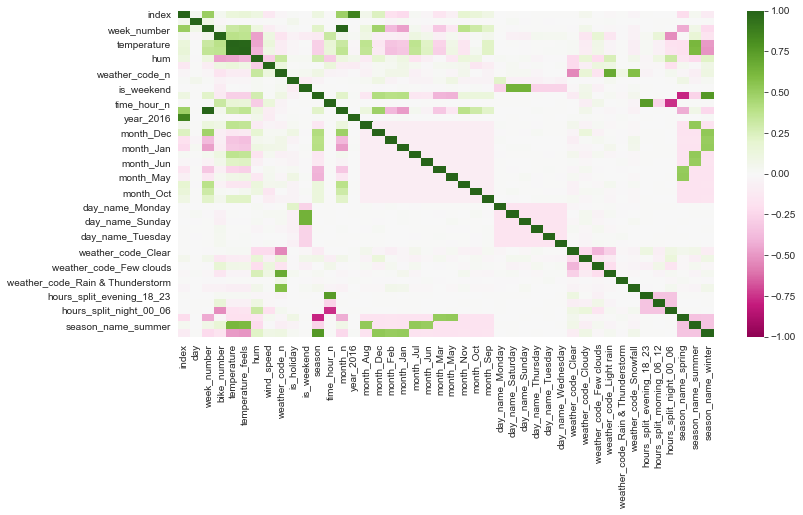

In [174]:
plt.clf()
fig = plt.figure(figsize=(12,6))
sns.heatmap(df1.corr(), cmap='PiYG', vmin=-1)
plt.show()

# Add Constant 

In [175]:
from statsmodels.api import add_constant

In [176]:
add_constant(df1)

,const,index,timestamp,date,day,week_number,time,bike_number,temperature,temperature_feels,...,weather_code_Few clouds,weather_code_Light rain,weather_code_Rain & Thunderstorm,weather_code_Snowfall,hours_split_evening_18_23,hours_split_morning_06_12,hours_split_night_00_06,season_name_spring,season_name_summer,season_name_winter
0,1.0,0,2015-01-04 00:00:00,04-01-2015,4,1,00:00,182,3.0,2.0,...,0,0,0,0,0,0,1,0,0,1
1,1.0,1,2015-01-04 01:00:00,04-01-2015,4,1,01:00,138,3.0,2.5,...,0,0,0,0,0,0,1,0,0,1
2,1.0,2,2015-01-04 02:00:00,04-01-2015,4,1,02:00,134,2.5,2.5,...,0,0,0,0,0,0,1,0,0,1
3,1.0,3,2015-01-04 03:00:00,04-01-2015,4,1,03:00,72,2.0,2.0,...,0,0,0,0,0,0,1,0,0,1
4,1.0,4,2015-01-04 04:00:00,04-01-2015,4,1,04:00,47,2.0,0.0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17337,1.0,17337,2016-12-31 19:00:00,31-12-2016,31,52,19:00,493,9.0,6.0,...,0,0,0,0,1,0,0,0,0,1
17338,1.0,17338,2016-12-31 20:00:00,31-12-2016,31,52,20:00,465,8.5,6.5,...,0,0,0,0,1,0,0,0,0,1
17339,1.0,17339,2016-12-31 21:00:00,31-12-2016,31,52,21:00,474,8.0,6.0,...,0,0,0,0,1,0,0,0,0,1
17340,1.0,17340,2016-12-31 22:00:00,31-12-2016,31,52,22:00,587,8.0,6.0,...,0,0,0,0,1,0,0,0,0,1


In [199]:
df1

,index,timestamp,date,day,week_number,time,bike_number,temperature,temperature_feels,hum,...,weather_code_Few clouds,weather_code_Light rain,weather_code_Rain & Thunderstorm,weather_code_Snowfall,hours_split_evening_18_23,hours_split_morning_06_12,hours_split_night_00_06,season_name_spring,season_name_summer,season_name_winter
0,0,2015-01-04 00:00:00,04-01-2015,4,1,00:00,182,3.0,2.0,93.0,...,0,0,0,0,0,0,1,0,0,1
1,1,2015-01-04 01:00:00,04-01-2015,4,1,01:00,138,3.0,2.5,93.0,...,0,0,0,0,0,0,1,0,0,1
2,2,2015-01-04 02:00:00,04-01-2015,4,1,02:00,134,2.5,2.5,96.5,...,0,0,0,0,0,0,1,0,0,1
3,3,2015-01-04 03:00:00,04-01-2015,4,1,03:00,72,2.0,2.0,100.0,...,0,0,0,0,0,0,1,0,0,1
4,4,2015-01-04 04:00:00,04-01-2015,4,1,04:00,47,2.0,0.0,93.0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17337,17337,2016-12-31 19:00:00,31-12-2016,31,52,19:00,493,9.0,6.0,82.0,...,0,0,0,0,1,0,0,0,0,1
17338,17338,2016-12-31 20:00:00,31-12-2016,31,52,20:00,465,8.5,6.5,84.5,...,0,0,0,0,1,0,0,0,0,1
17339,17339,2016-12-31 21:00:00,31-12-2016,31,52,21:00,474,8.0,6.0,87.0,...,0,0,0,0,1,0,0,0,0,1
17340,17340,2016-12-31 22:00:00,31-12-2016,31,52,22:00,587,8.0,6.0,90.0,...,0,0,0,0,1,0,0,0,0,1


In [178]:
#df1.to_csv('london_merged_DUMMIES_v5.csv', index=False)

In [177]:
from statsmodels.api import OLS
from statsmodels.formula.api import ols

In [201]:
df2_numeric =  df1._get_numeric_data()

In [202]:
df2_numeric

,index,day,week_number,bike_number,temperature,temperature_feels,hum,wind_speed,weather_code_n,is_holiday,...,weather_code_Few clouds,weather_code_Light rain,weather_code_Rain & Thunderstorm,weather_code_Snowfall,hours_split_evening_18_23,hours_split_morning_06_12,hours_split_night_00_06,season_name_spring,season_name_summer,season_name_winter
0,0,4,1,182,3.0,2.0,93.0,6.0,3,0.0,...,0,0,0,0,0,0,1,0,0,1
1,1,4,1,138,3.0,2.5,93.0,5.0,1,0.0,...,0,0,0,0,0,0,1,0,0,1
2,2,4,1,134,2.5,2.5,96.5,0.0,1,0.0,...,0,0,0,0,0,0,1,0,0,1
3,3,4,1,72,2.0,2.0,100.0,0.0,1,0.0,...,0,0,0,0,0,0,1,0,0,1
4,4,4,1,47,2.0,0.0,93.0,6.5,1,0.0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17337,17337,31,52,493,9.0,6.0,82.0,17.0,4,0.0,...,0,0,0,0,1,0,0,0,0,1
17338,17338,31,52,465,8.5,6.5,84.5,13.0,4,0.0,...,0,0,0,0,1,0,0,0,0,1
17339,17339,31,52,474,8.0,6.0,87.0,12.0,4,0.0,...,0,0,0,0,1,0,0,0,0,1
17340,17340,31,52,587,8.0,6.0,90.0,12.0,4,0.0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
#(df.MinutesOfBeingAwake, df._get_numeric_data().drop('MinutesOfBeingAwake', axis=1)).fit().summary()

In [217]:
OLS(df2_numeric.bike_number, add_constant(df2_numeric).drop(to_remove, axis=1)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            bike_number   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     521.0
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:51:04   Log-Likelihood:            -1.4067e+05
No. Observations:               17342   AIC:                         2.814e+05
Df Residuals:                   17314   BIC:                         2.816e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             2987.3237     87.208     34.255      0.000    2816.388    3158.260
temperature                         57.2070      8.346      6.854      0.000      40.847      73.567
temperature_feels                  -16.3770      6.900     -2.374      0.018     -29.901      -2.853
hum                                -14.0502      0.616    -22.795      0.000     -15.258     -12.842
is_holiday                        -279.9270     44.819     -6.246      0.000    -367.778    -192.076
is_weekend                        -220.8002     18.842    -11.719      0.000    -257.732    -183.869
time_hour_n                        -47.6198      3.593    -13.252      0.000     -54.663     -40.576
month_Aug                          -53.1434     18.893     -2.813      0.005     -90.176     -16.110
month_Dec                          -55.9306     19.001     -2.944      0.003     -93.174     -18.687
month_Feb                          -45.2478     20.367     -2.222      0.026     -85.169      -5.327
month_Jan                          -47.7269     19.580     -2.437      0.015     -86.106      -9.347
month_Jul                          -33.1605     18.942     -1.751      0.080     -70.289       3.968
month_Jun                          -19.1295     18.488     -1.035      0.301     -55.368      17.109
month_Mar                          -56.6637     30.714     -1.845      0.065    -116.867       3.539
month_May                           16.8772     31.098      0.543      0.587     -44.078      77.833
month_Nov                         -128.8120     31.043     -4.149      0.000    -189.660     -67.964
month_Sep                         -121.8935     31.317     -3.892      0.000    -183.279     -60.508
day_name_Monday                    -41.5060     19.110     -2.172      0.030     -78.963      -4.049
day_name_Sunday                    -15.6054     22.985     -0.679      0.497     -60.659      29.448
day_name_Tuesday                    11.8455     18.745      0.632      0.527     -24.896      48.587
weather_code_Cloudy                -72.9306     23.453     -3.110      0.002    -118.901     -26.960
weather_code_Few clouds             36.9916     15.459      2.393      0.017       6.691      67.292
weather_code_Light rain           -258.5853     20.626    -12.537      0.000    -299.014    -218.156
weather_code_Rain & Thunderstorm -1033.1816    216.438     -4.774      0.000   -1457.422    -608.941
hours_split_evening_18_23          -96.4488     28.307     -3.407      0.001    -151.933     -40.965
hours_split_morning_06_12         -342.2406     28.739    -11.908      0.000    -398.573    -285.909
hours_split_night_00_06          -1779.8948     47.908    -37.152      0.000   -1873.799   -1685.991
season_name_spring                -148.6154     31.67

In [ ]:
to_remove = ['bike_number', 'index', 'year_2016', 'weather_code_Clear', 'day_name_Thursday', 'month_Oct',
            'weather_code_Snowfall', 'day_name_Wednesday', 'day_name_Saturday', 'weather_code_n']

* First:
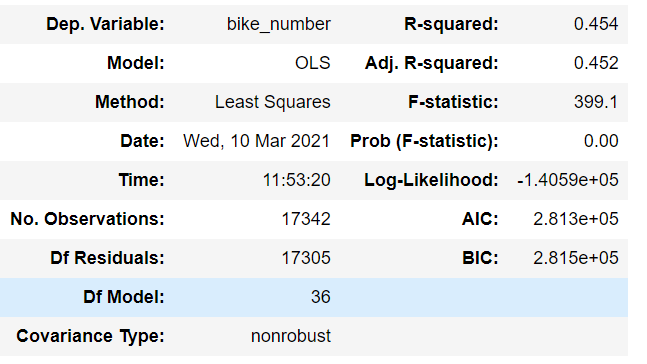
* weather_code_n
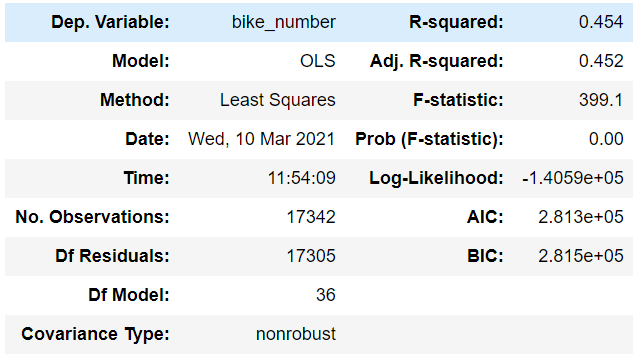
* Index
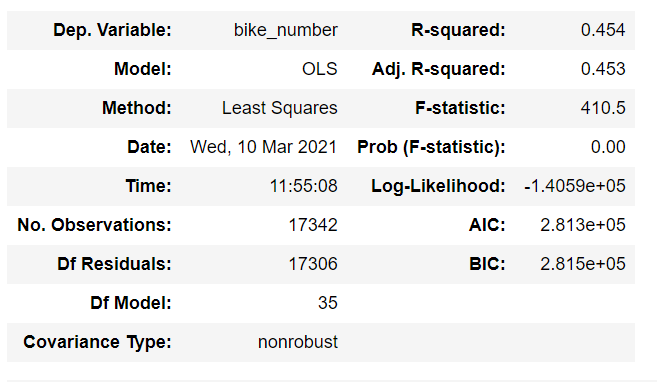
* Month August
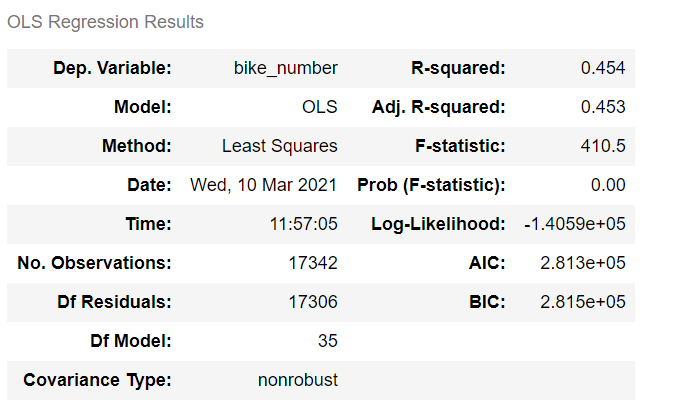
* Month October
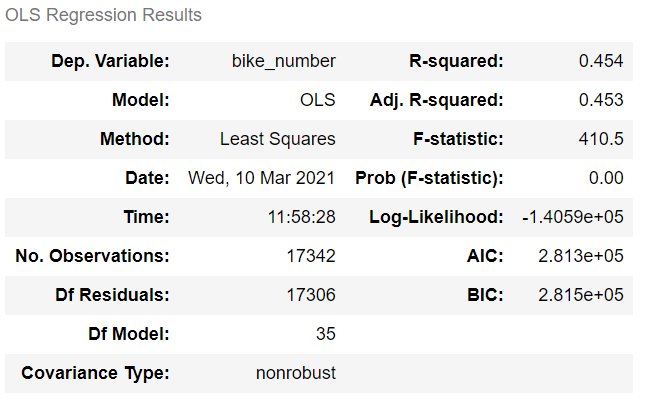
* Month September
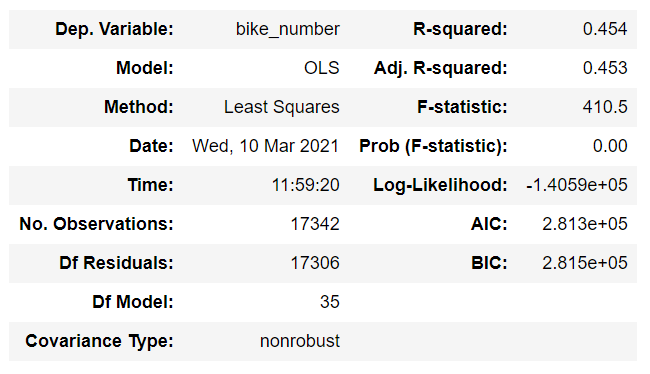
* Day_name_Thursday
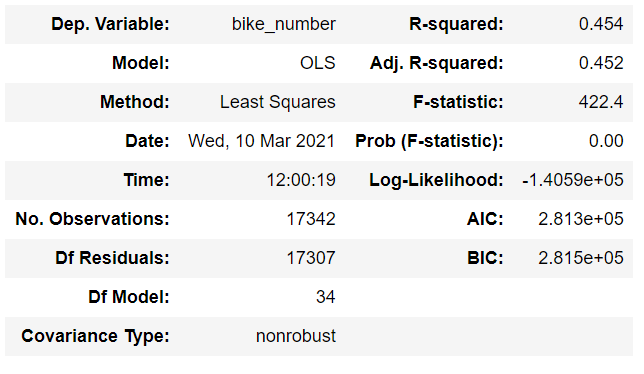
* Year - 2016 
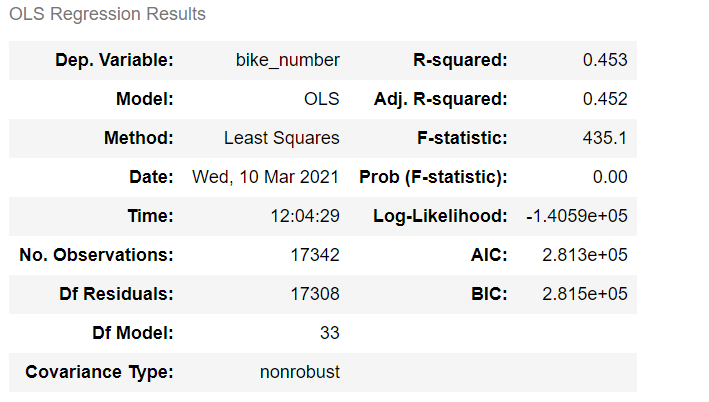
* Day_name_Saturday
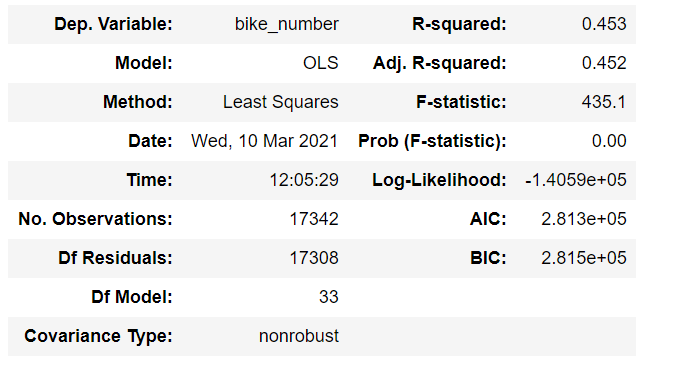
* Day_name_Thursday
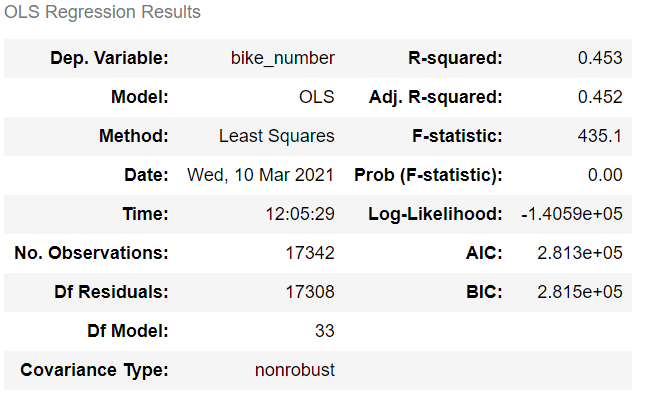
* Day_name_Wednesday
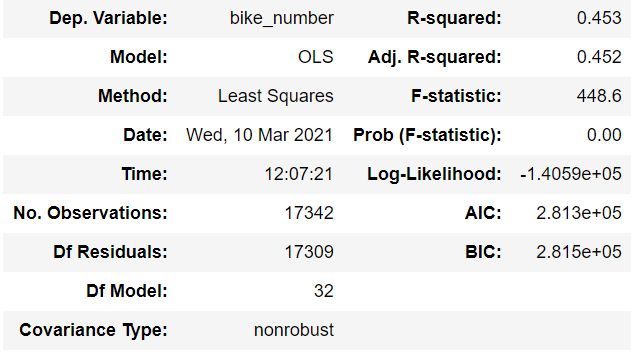
* Weather_Code_Clear
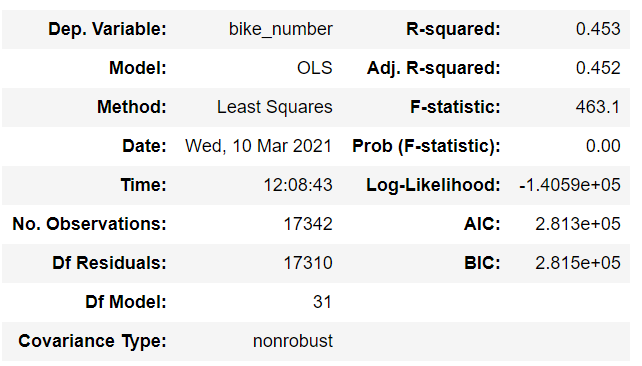
* Weather_Code_Snowball
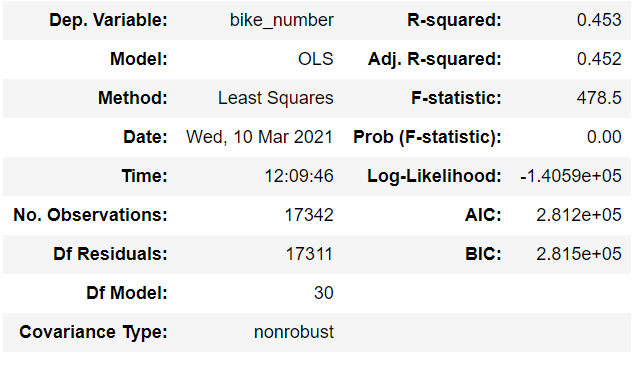
 * Season_Name_Winter
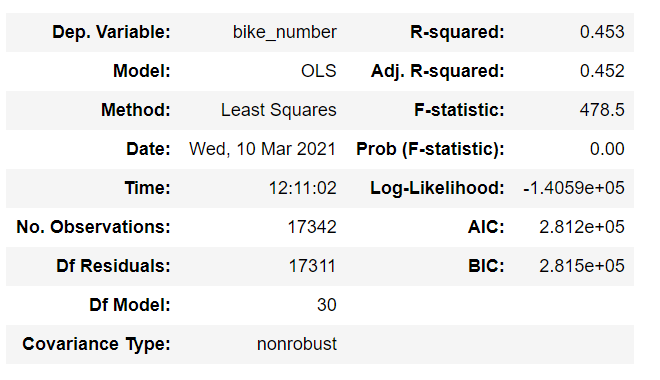

* Parameters that are most likely VIOLATE linearity assumption and their correlation with bike_number
1. day           -0.021814
2. week_number    0.057645
3. wind_speed     0.115708
4. season        -0.1135630
5. month_n        0.060369


* Parameters that are most likely FOLLOW linearity assumption and their correlation with bike_number
1. temperature          0.387686
2. temperature_feels    0.367890
3. hum                 -0.461812
4. time_hour_n          0.325192

* Day
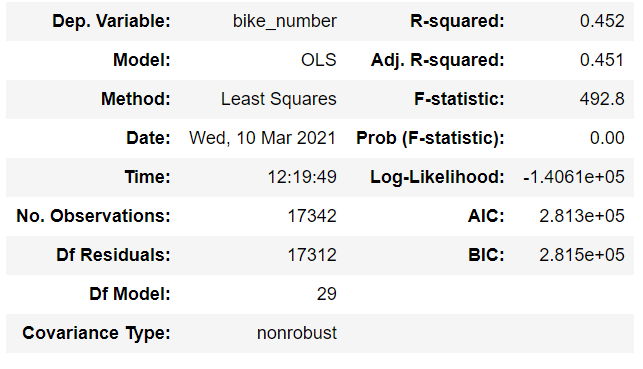

* Removing Day give us the following P_Values
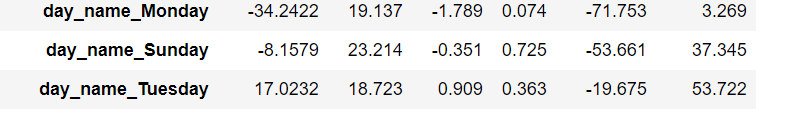

* Day_name_monday:
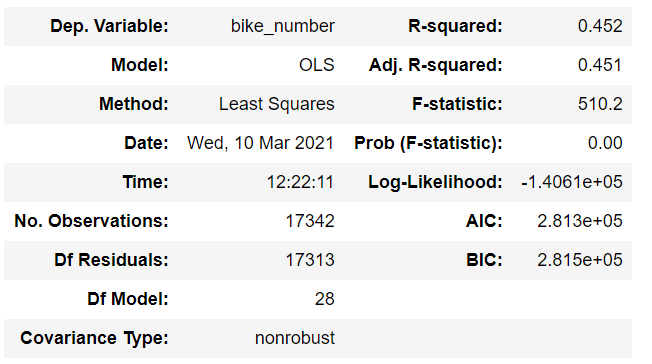

* Day_name_Sunday
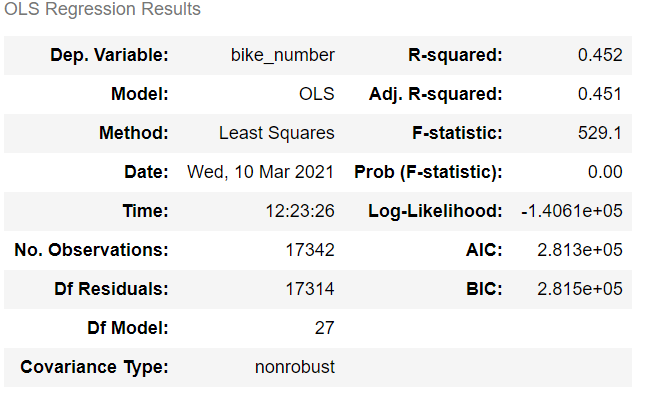

* Parameters that are most likely VIOLATE linearity assumption and their correlation with bike_number
1. week_number    0.057645
2. wind_speed     0.115708
3. season        -0.113563
4. month_n        0.060369

* Week Number
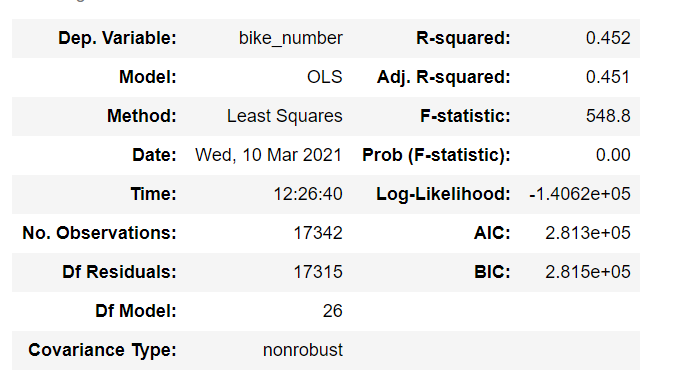

* Day_Name_Thursday
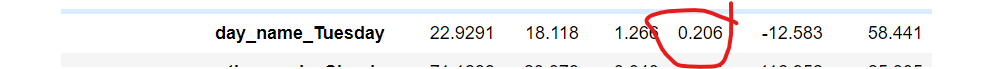

* Day_Mame_Tuesday
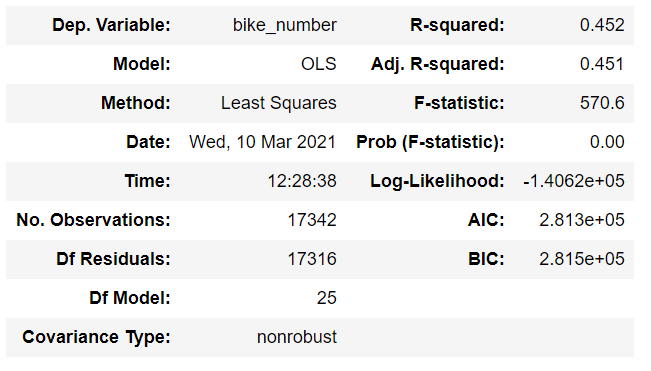

In [263]:
to_remove = ['bike_number', 'weather_code_n', 'index', 'month_Aug', 'month_Oct', 'month_Sep', 'day_name_Thursday', 'year_2016', 'day_name_Saturday',
            'day_name_Wednesday', 'weather_code_Clear', 'weather_code_Snowfall', 'season_name_winter', 'day', 'day_name_Monday', 'day_name_Sunday',
            'week_number', 'day_name_Tuesday']

In [261]:
OLS(df1.bike_number, add_constant(df2_numeric).drop(to_remove, axis=1)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            bike_number   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     570.6
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:28:38   Log-Likelihood:            -1.4062e+05
No. Observations:               17342   AIC:                         2.813e+05
Df Residuals:                   17316   BIC:                         2.815e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             1082.4862    227.671      4.755      0.000     636.229    1528.744
temperature                         88.3008      8.791     10.044      0.000      71.069     105.533
temperature_feels                  -38.1428      7.157     -5.330      0.000     -52.171     -24.115
hum                                -14.9271      0.619    -24.106      0.000     -16.141     -13.713
wind_speed                          -9.8474      0.919    -10.720      0.000     -11.648      -8.047
is_holiday                        -302.4363     43.734     -6.915      0.000    -388.159    -216.713
is_weekend                        -220.5373     13.668    -16.135      0.000    -247.328    -193.746
season                             259.3250     46.330      5.597      0.000     168.513     350.137
time_hour_n                        -47.7837      3.582    -13.339      0.000     -54.805     -40.762
month_n                            144.1119     31.280      4.607      0.000      82.801     205.423
month_Dec                         -693.6075     44.269    -15.668      0.000    -780.379    -606.836
month_Feb                          750.6509    285.865      2.626      0.009     190.326    1310.975
month_Jan                          904.4783    316.535      2.857      0.004     284.038    1524.919
month_Jul                          179.6015     43.143      4.163      0.000      95.037     264.166
month_Jun                          352.0761     71.141      4.949      0.000     212.633     491.520
month_Mar                          109.0341     44.627      2.443      0.015      21.560     196.508
month_May                         -125.0206     45.206     -2.766      0.006    -213.629     -36.412
month_Nov                         -222.2511     52.404     -4.241      0.000    -324.968    -119.534
weather_code_Cloudy                -71.5080     23.377     -3.059      0.002    -117.329     -25.687
weather_code_Few clouds             53.8540     15.490      3.477      0.001      23.493      84.215
weather_code_Light rain           -223.5039     20.808    -10.741      0.000    -264.289    -182.718
weather_code_Rain & Thunderstorm -1004.3249    215.713     -4.656      0.000   -1427.145    -581.505
hours_split_evening_18_23         -101.1107     28.220     -3.583      0.000    -156.425     -45.796
hours_split_morning_06_12         -342.4864     28.647    -11.955      0.000    -398.638    -286.335
hours_split_night_00_06          -1787.3832     47.761    -37.423      0.000   -1881.000   -1693.767
season_name_spring                1258.1604     91.488     13.752      0.000    1078.835    1437.486
season_name_summer                 350.8484     29.628     11.842      0.000     292.775     408.922
=====================================================

In [265]:
X, y = add_constant(df2_numeric).drop(to_remove, axis=1), df2_numeric.bike_number

In [266]:
model_fit=OLS(y, X).fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            bike_number   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     570.6
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:30:02   Log-Likelihood:            -1.4062e+05
No. Observations:               17342   AIC:                         2.813e+05
Df Residuals:                   17316   BIC:                         2.815e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             1082.4862    227.671      4.755      0.000     636.229    1528.744
temperature                         88.3008      8.791     10.044      0.000      71.069     105.533
temperature_feels                  -38.1428      7.157     -5.330      0.000     -52.171     -24.115
hum                                -14.9271      0.619    -24.106      0.000     -16.141     -13.713
wind_speed                          -9.8474      0.919    -10.720      0.000     -11.648      -8.047
is_holiday                        -302.4363     43.734     -6.915      0.000    -388.159    -216.713
is_weekend                        -220.5373     13.668    -16.135      0.000    -247.328    -193.746
season                             259.3250     46.330      5.597      0.000     168.513     350.137
time_hour_n                        -47.7837      3.582    -13.339      0.000     -54.805     -40.762
month_n                            144.1119     31.280      4.607      0.000      82.801     205.423
month_Dec                         -693.6075     44.269    -15.668      0.000    -780.379    -606.836
month_Feb                          750.6509    285.865      2.626      0.009     190.326    1310.975
month_Jan                          904.4783    316.535      2.857      0.004     284.038    1524.919
month_Jul                          179.6015     43.143      4.163      0.000      95.037     264.166
month_Jun                          352.0761     71.141      4.949      0.000     212.633     491.520
month_Mar                          109.0341     44.627      2.443      0.015      21.560     196.508
month_May                         -125.0206     45.206     -2.766      0.006    -213.629     -36.412
month_Nov                         -222.2511     52.404     -4.241      0.000    -324.968    -119.534
weather_code_Cloudy                -71.5080     23.377     -3.059      0.002    -117.329     -25.687
weather_code_Few clouds             53.8540     15.490      3.477      0.001      23.493      84.215
weather_code_Light rain           -223.5039     20.808    -10.741      0.000    -264.289    -182.718
weather_code_Rain & Thunderstorm -1004.3249    215.713     -4.656      0.000   -1427.145    -581.505
hours_split_evening_18_23         -101.1107     28.220     -3.583      0.000    -156.425     -45.796
hours_split_morning_06_12         -342.4864     28.647    -11.955      0.000    -398.638    -286.335
hours_split_night_00_06          -1787.3832     47.761    -37.423      0.000   -1881.000   -1693.767
season_name_spring                1258.1604     91.488     13.752      0.000    1078.835    1437.486
season_name_summer                 350.8484     29.628     11.842      0.000     292.775     408.922
=====================================================

Fitting linear regression

R^2: 0.4517161290527619 

Coefficients
-------------------------------------
Intercept: 1563.5912220084072
const: -0.0
temperature: 88.3
temperature_feels: -38.14
hum: -14.93
wind_speed: -9.85
is_holiday: -302.44
is_weekend: -220.54
season: 18.77
time_hour_n: -47.78
month_n: 144.11
month_Dec: -453.06
month_Feb: 991.2
month_Jan: 1145.03
month_Jul: 179.6
month_Jun: 352.08
month_Mar: 109.03
month_May: -125.02
month_Nov: -222.25
weather_code_Cloudy: -71.51
weather_code_Few clouds: 53.85
weather_code_Light rain: -223.5
weather_code_Rain & Thunderstorm: -1004.32
hours_split_evening_18_23: -101.11
hours_split_morning_06_12: -342.49
hours_split_night_00_06: -1787.38
season_name_spring: 777.06
season_name_summer: 110.3

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


C:\Users\israe\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


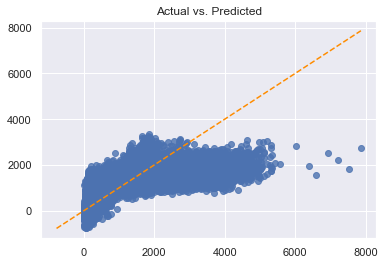

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with bike_number


wind_speed    0.115708
season       -0.113563
month_n       0.060369
Name: bike_number, dtype: float64


Parameters that are most likely FOLLOW linearity assumption and their correlation with bike_number


temperature          0.387686
temperature_feels    0.367890
hum                 -0.461812
time_hour_n          0.325192
Name: bike_number, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


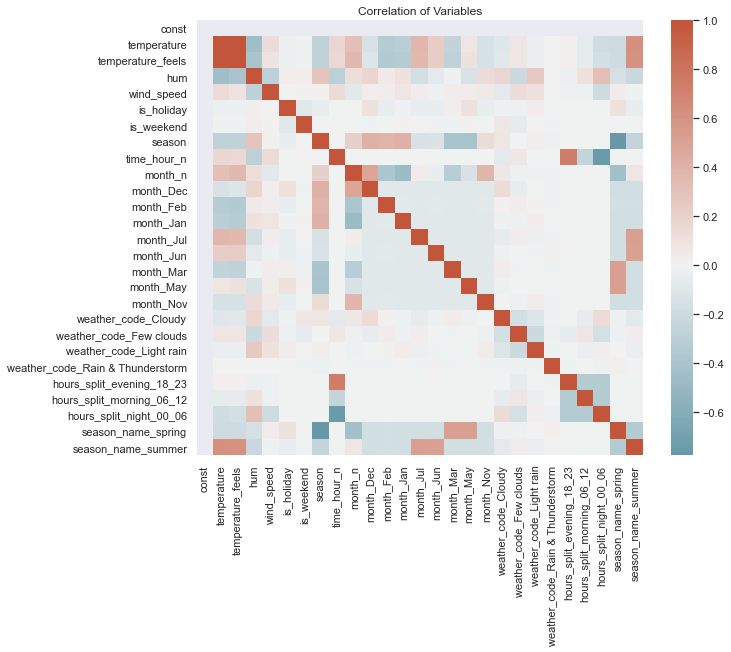

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------


C:\Users\israe\miniconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\israe\miniconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


season: inf
month_Dec: inf
month_Feb: inf
month_Jan: inf
season_name_spring: inf
season_name_summer: inf
month_n: 310.31908683302225
temperature: 63.95746296924984
temperature_feels: 59.663603143892644
time_hour_n: 16.436927866773306
hours_split_night_00_06: 11.4176398608586
month_Jun: 10.203581042189075
month_Nov: 5.5649549230595445
month_May: 4.293413540844158
month_Mar: 4.133175287092251
hours_split_morning_06_12: 4.122270511611415
hours_split_evening_18_23: 4.000328888354988
month_Jul: 3.8938190933328527
hum: 2.1045276231477597
wind_speed: 1.412187706206735
weather_code_Light rain: 1.2478534661647713
weather_code_Few clouds: 1.1457282151512571
weather_code_Cloudy: 1.1263797068120884
is_holiday: 1.0413588731463492
is_weekend: 1.0200708612799214
weather_code_Rain & Thunderstorm: 1.0053113767390853
const: 0.0

12 cases of possible multicollinearity
7 cases of definite multicollinearity

Assumption not satisfied

Coefficient interpretability will be problematic
Consider removing variab

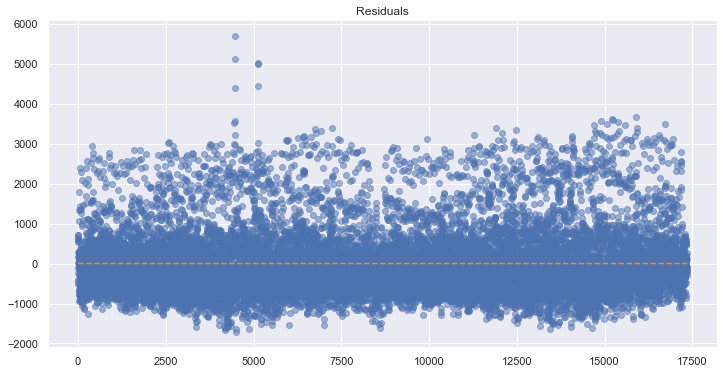

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 2160.736898971085,
 'pvalue for LM': 0.0,
 'F stats': 98.58289101134798,
 'pvalue for Fstats': 0.0}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


C:\Users\israe\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


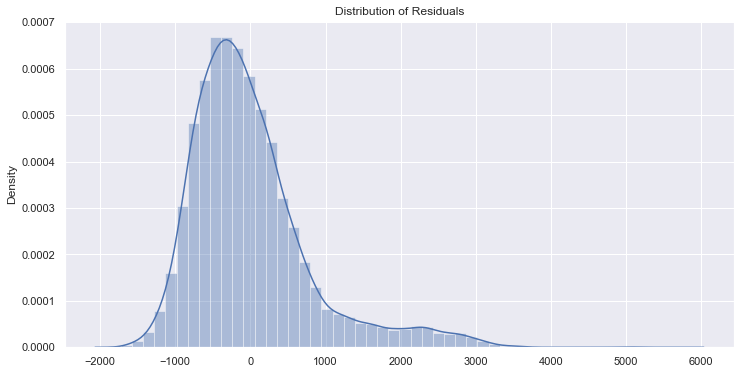


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


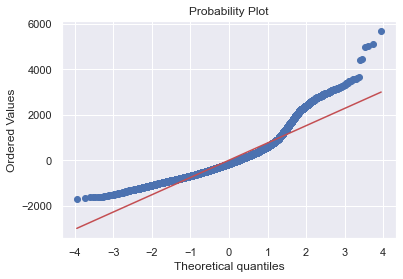


In fact outliers are super significant. Probably it is better to split your dataset into 2 different ones.


{'Satisfied': [],
 'Potentially': ['Linearity', 'Autocorrelation'],
 'Violated': ['Multicollinearity',
  'Autocorrelation',
  'Normality',
  'Sub-Normality']}

In [267]:
import Assumptions
tester = Assumptions.Assumption_Tester_OLS(X, y)
tester.run_all()

from sklearn.preprocessing import QuantileTransformer

qt=QuantileTransformer()
df['boooooo']=qt.fit_transform(df[['bike_number']])

ols('bike_number ~temperature +hum  +is_weekend +is_holiday +pd.qcut(time_hour_n,5)',data=df).fit().summary()

In [315]:
df['year']=df.year-2015

In [318]:
ols('bike_number ~temperature +hum +index +is_weekend +is_holiday +pd.qcut(time_hour_n,5)',data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            bike_number   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     1909.
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:18:32   Log-Likelihood:            -1.3986e+05
No. Observations:               17342   AIC:                         2.797e+05
Df Residuals:                   17332   BIC:                         2.798e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                        1157.6452     48.348     23.944      0.000    1062.878    1252.412
pd.qcut(time_hour_n, 5)[T.Interval(4.0, 9.0, closed='right')]    1134.0270     18.144     62.500      0.000    1098.462    1169.592
pd.qcut(time_hour_n, 5)[T.Interval(9.0, 14.0, closed='right')]    768.3355     19.512     39.378      0.000     730.090     806.581
pd.qcut(time_hour_n, 5)[T.Interval(14.0, 19.0, closed='right')]  1533.4779     19.661     77.995      0.000    1494.940    1572.016
pd.qcut(time_hour_n, 5)[T.Interval(19.0, 23.0, closed='right')]   389.3642     19.452     20.017      0.000     351.237     427.492
temperature                                                        38.7849      1.206     32.151      0.000      36.420      41.149
hum                                                               -17.8312      0.514    -34.666      0.000     -18.839     -16.823
index                                                               0.0093      0.001      7.733      0.000       0.007       0.012
is_weekend                                                       -223.9191     13.009    -17.213      0.000    -249.418    -198.420
is_holiday                                                       -341.3882     41.206     -8.285      0.000    -422.155    -260.621
==============================================================================
Omnibus:                     4545.576   Durbin-Watson:                   0.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14104.764
Skew:                           1.345   Prob(JB):                         0.00
Kurtosis:                       6.505   Cond. No.                     8.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [339]:
df.shape

(17342, 24)

In [319]:
from datetime import timedelta, datetime

In [340]:
pd.to_datetime(df.timestamp)[0]+timedelta(hours=10000)

Timestamp('2016-02-24 16:00:00')

In [341]:
10000*0.0093

92.99999999999999